In [44]:
#!pip install --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host files.pythonhosted.org pandas

import tensorflow as tf
from keras import layers
import pandas as pd

In [45]:
#https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data

#Load data from keras toy datasets
(x_train_org, y_train_org), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

#split the training data set to train and validate. Validation is not the test data set
x_train, y_train = x_train_org[:-5000], y_train_org[:-5000]
x_validation, y_validation = x_train_org[-5000:], y_train_org[-5000:]

In [46]:
x_train, x_validation, x_test = x_train/255.0, x_validation/255.0, x_test/255.0

Label	Description
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot

In [47]:
fashion_cat = ["0	T-shirt/top", 
"1	Trouser", 
"2	Pullover", 
"3	Dress", 
"4	Coat", 
"5	Sandal", 
"6	Shirt", 
"7	Sneaker", 
"8	Bag", 
"9	Ankle boot"]

#fashion_cat[y_train[5]]

In [48]:
#Build a 3 hidden layer dense neural network for classification
from tensorflow.keras.initializers import Zeros, RandomNormal, GlorotNormal

w_init = GlorotNormal()
b_init = Zeros()

model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu", kernel_initializer=w_init,  bias_initializer=b_init))
model.add(tf.keras.layers.Dense(100, activation="relu", kernel_initializer=w_init,  bias_initializer=b_init))
model.add(tf.keras.layers.Dense(10, activation="softmax", kernel_initializer=w_init,  bias_initializer=b_init))

In [50]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [72]:
history = model.fit(x_train, y_train, epochs = 20, validation_data=(x_validation, y_validation))

#batch size is 32 by default. It can be changed using batch_size parameter
#training set is 55000
#number of batches per epoch is 1719 based on 55000/32 => 1718 of batch size 32 and remaining 24 is the batch 1719

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9240 - loss: 0.2129 - val_accuracy: 0.8826 - val_loss: 0.3218
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9229 - loss: 0.2125 - val_accuracy: 0.8852 - val_loss: 0.3303
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9228 - loss: 0.2156 - val_accuracy: 0.8842 - val_loss: 0.3129
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9273 - loss: 0.2093 - val_accuracy: 0.8906 - val_loss: 0.3171
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9272 - loss: 0.2071 - val_accuracy: 0.8850 - val_loss: 0.3223
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9281 - loss: 0.2017 - val_accuracy: 0.8856 - val_loss: 0.3227
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9291 - loss: 0.1987 - val_accuracy: 0.8860 - val_loss: 0.3150
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9309 - loss: 0.1961 - 

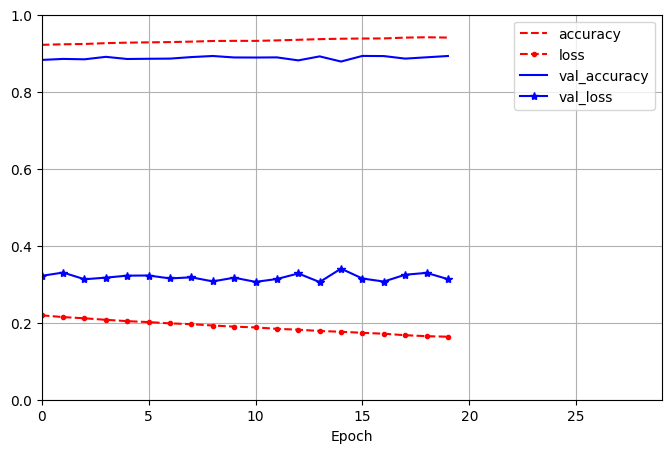

In [76]:
from matplotlib import pyplot

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.show()

In [77]:
_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_test, verbose=0)

print("Train Accuracy: %.2f, Test Accuracy: %.2f"  %(train_acc, test_acc))

Train Accuracy: 0.95, Test Accuracy: 0.89


In [81]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

Epoch 20: early stopping


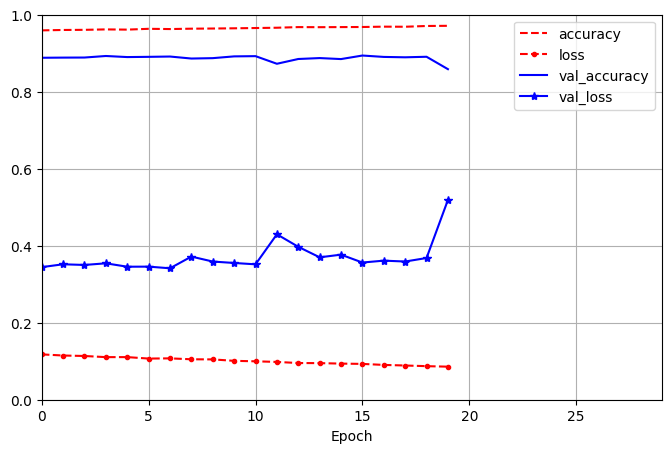

In [80]:
history = model.fit(x_train, y_train, epochs = 60, validation_data=(x_validation, y_validation), callbacks=[es], verbose=0)

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.show()

In [84]:
m_cb = ModelCheckpoint('best_model.keras', save_best_only=True, verbose=1, monitor='val_loss')
history = model.fit(x_train, y_train, epochs = 60, validation_data=(x_validation, y_validation), callbacks=[es, m_cb])

Epoch 1/60
1714/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9828 - loss: 0.0516
Epoch 1: val_loss improved from inf to 0.43655, saving model to best_model.keras
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9828 - loss: 0.0516 - val_accuracy: 0.8838 - val_loss: 0.4366
Epoch 2/60
1714/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9842 - loss: 0.0506
Epoch 2: val_loss improved from 0.43655 to 0.41825, saving model to best_model.keras
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9842 - loss: 0.0506 - val_accuracy: 0.8876 - val_loss: 0.4182
Epoch 3/60
1715/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9852 - loss: 0.0479
Epoch 3: val_loss did not improve from 0.41825
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9852 - loss: 0.0479 - val_accuracy: 0.8852 - val_loss: 0.4516
Epoch 4/60
1713/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9849 - loss: 0.0495
Epoch 4: val_loss did not improve from 0.41825
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 

In [85]:
from keras.models import load_model

saved_model = load_model('best_model.keras')

In [86]:
saved_model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 964us/step - accuracy: 0.8932 - loss: 0.4585


[0.4486004114151001, 0.8903999924659729]

In [87]:
y_hat = saved_model.predict(x_test[:3]).round(2)
y_hat

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

Assignment

Pick your favourite dataset and fine tune thenetwork to get the best accuracy by fine tuning hyperparameters namely -
a) # of layers
b) # of neurons
c) Learning rate
d) Batch size
e) L1/L2 Regularization
f) Dropout